# Multiple Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("D:/Data Science/Latest Data Science Material/Python Intro/datasets/mtcars.csv")
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [2]:
df.head()
# drop the column
#x=df.drop(columns=["model","mpg"])
#df["mpg"]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [4]:
x=df[["cyl","disp","hp","drat","wt","qsec","vs","gear","carb"]]  # -->independent
y=df["mpg"]

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5)
# step 3
model=LinearRegression()
model.fit(xtrain,ytrain)
# step 4
ypred=model.predict(xtest)
data=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
print(data)
print("R square:",model.score(xtrain,ytrain))
print("y intercept",model.intercept_)
print("slope",model.coef_)

    Actual  Predicted
18    30.4  26.716292
24    19.2  15.801177
4     18.7  15.584009
10    17.8  18.327276
19    33.9  23.688204
12    17.3  12.221687
11    16.4  11.965928
20    21.5  21.636174
7     24.4  23.624200
5     18.1  17.976382
13    15.2  11.489458
30    15.0  12.093919
15    10.4  11.631160
17    32.4  23.983049
8     22.8  17.063019
3     21.4  19.928808
R square: 0.9230474608814105
y intercept 66.4200487876901
slope [-2.13320025  0.02265912 -0.04977051 -0.70507689 -1.7037641  -1.61760282
  2.80676643  0.68500334  0.17032388]


<module 'matplotlib.pyplot' from 'C:\\Program Files\\data science\\lib\\site-packages\\matplotlib\\pyplot.py'>

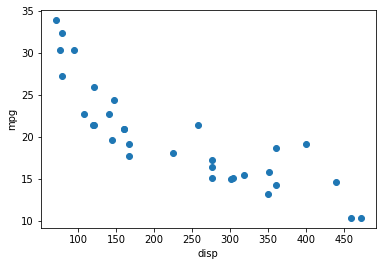

In [6]:
x=df[["disp"]]  # -->independent
y=df["mpg"]
plt.scatter(x,y)
plt.xlabel("disp")
plt.ylabel("mpg")
plt

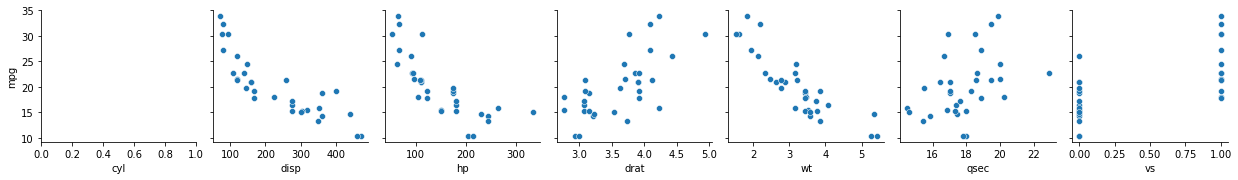

In [7]:
import seaborn as sns
sns.pairplot(data=df,x_vars=["cyl","disp","hp","drat","wt","qsec","vs"],y_vars="mpg")

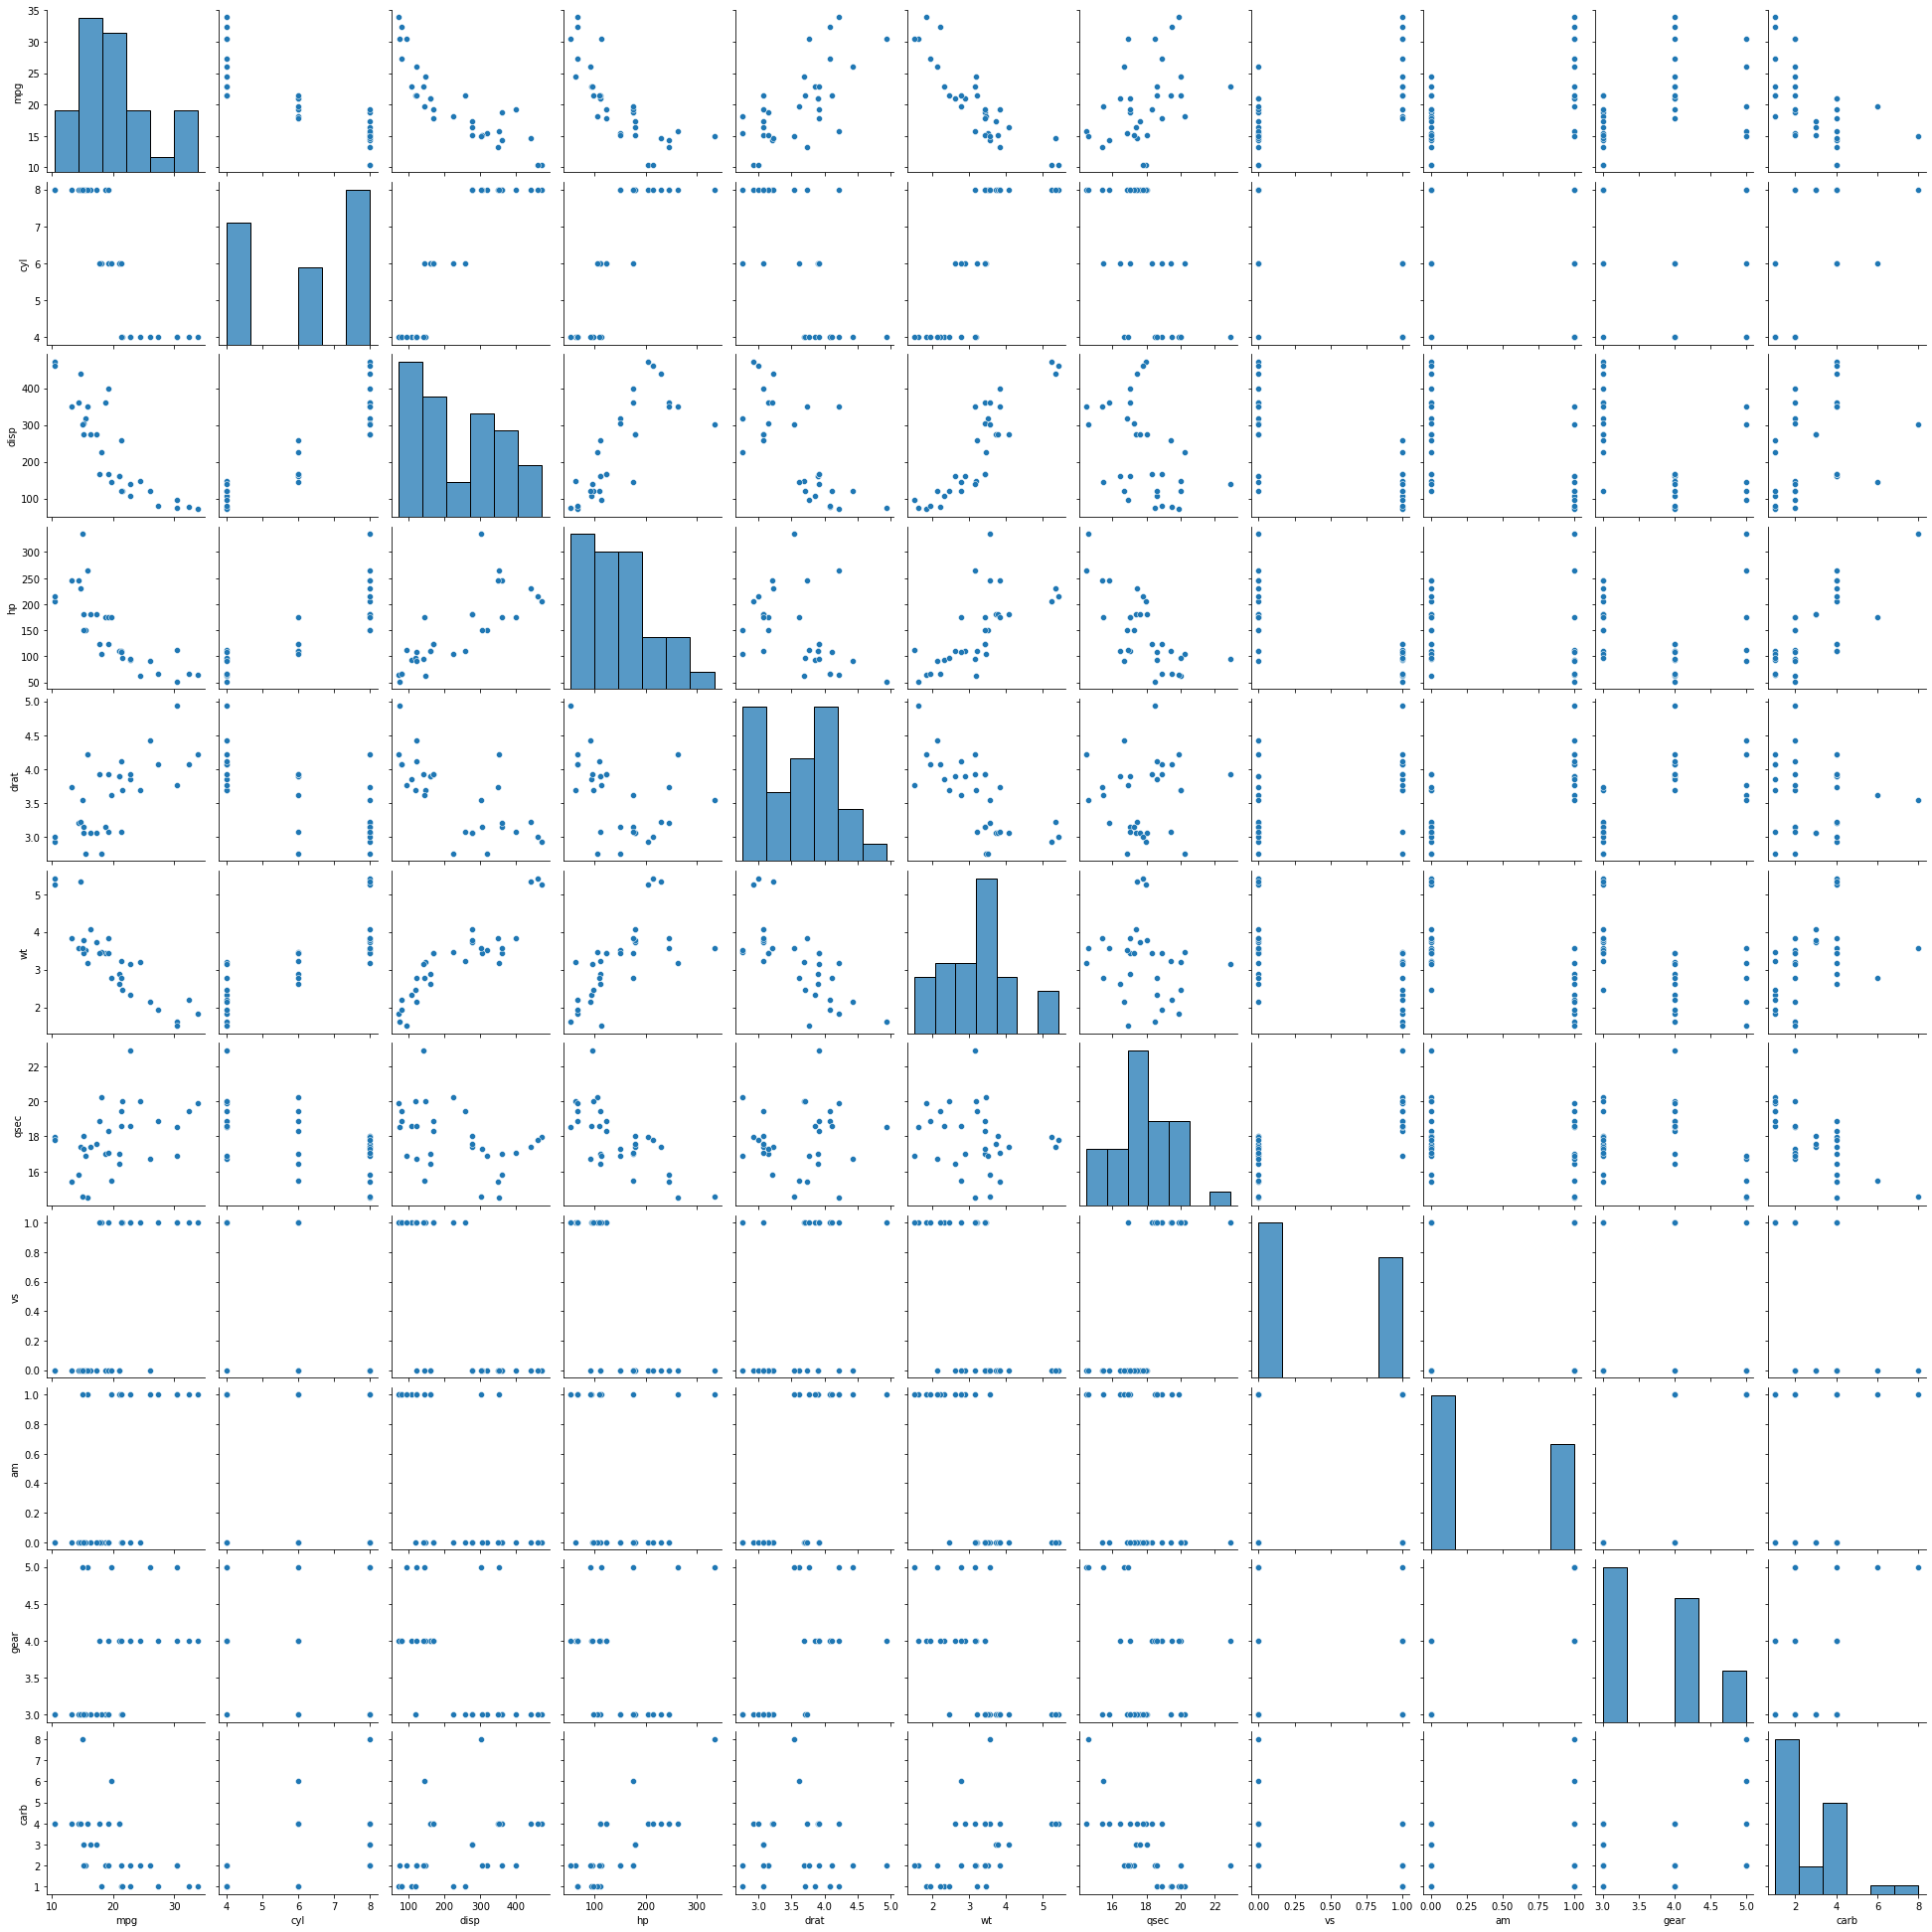

In [8]:
sns.pairplot(df)

<AxesSubplot:>

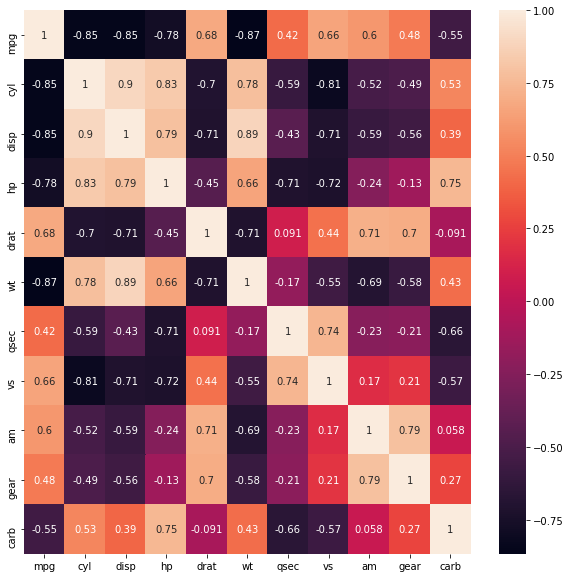

In [9]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True) 

## Creating model

In [10]:
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.7183433404897299

In [11]:
ypred=model.predict(x)

In [12]:
res=y-ypred
np.mean(res)
# -4.27x10^-15

-4.163336342344337e-15

C:\Program Files\data science\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

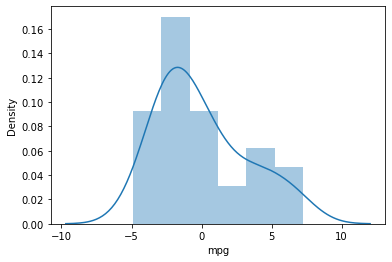

In [13]:
sns.distplot(res)

### Divide data 80% Training dataset and 20% test dataset

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=(0.2))

In [15]:
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.7470822985682668

In [16]:
ypred=model.predict(xtest)

In [17]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
6,14.3,15.342153
23,13.3,15.763358
21,15.5,17.111214
30,15.0,17.827262
10,17.8,23.446134
31,21.4,25.408948
29,19.7,24.398057


In [18]:
residual=ytest-ypred
residual

6    -1.042153
23   -2.463358
21   -1.611214
30   -2.827262
10   -5.646134
31   -4.008948
29   -4.698057
Name: mpg, dtype: float64

In [19]:
np.mean(residual)

-3.1853036931731435

C:\Program Files\data science\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

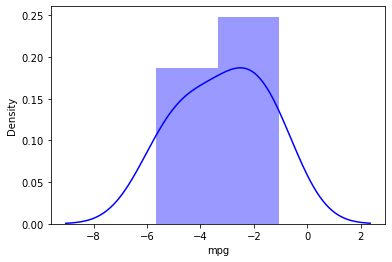

In [20]:
sns.distplot(residual,kde=True,color="b")

In [21]:
s=StandardScaler()
X_scale=s.fit_transform(x)
model.fit(X_scale,y)
model.score(X_scale,y)

0.7183433404897299

In [22]:
m=MinMaxScaler()
X_sc=s.fit_transform(x)
model.fit(X_sc,y)
model.score(X_sc,y)

0.7183433404897299

# Removing the outliyers from the given Dataset

<AxesSubplot:>

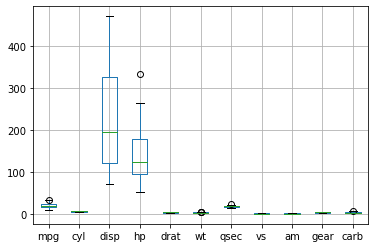

In [23]:
df.boxplot()

In [24]:
# IQR--> Q3-Q1     Q--> quantile
# IQR ---> interquartile range
# range -- Q1-1.5*IQR to Q3+1.5*IQR

In [25]:
Q1=df.quantile(0.25)
Q1

mpg      15.42500
cyl       4.00000
disp    120.82500
hp       96.50000
drat      3.08000
wt        2.58125
qsec     16.89250
vs        0.00000
am        0.00000
gear      3.00000
carb      2.00000
Name: 0.25, dtype: float64

In [26]:
Q3=df.quantile(0.75)
Q3

mpg      22.80
cyl       8.00
disp    326.00
hp      180.00
drat      3.92
wt        3.61
qsec     18.90
vs        1.00
am        1.00
gear      4.00
carb      4.00
Name: 0.75, dtype: float64

In [27]:
IQR=Q3-Q1

False==> not outlier and True==> outlier

In [28]:
(df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [29]:
new_df=df[~((df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)).any(axis=1)]

In [30]:
new_df.shape,df.shape

((26, 11), (32, 11))

In [31]:
new_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4


In [32]:
x=new_df[["cyl","disp","hp","drat","wt","qsec","vs","gear","carb"]]  # -->independent
y=new_df["mpg"]

In [33]:
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8607479980747106

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=(0.2))
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8916200026081067